In [29]:
__author__ = "Marco Sanguineti"
__copyright__ = "Copyright (C) 2022 Deeplabs"
__license__ = "MIT"
__version__ = "1.0"

In [30]:
%%bash
python --version

Python 3.8.10


In [31]:
import numpy as np
import pandas as pd
import os
import plotly.graph_objects as go

In [32]:
if 'flag' not in vars():
    os.chdir(os.path.dirname(os.getcwd()))
    flag = 0

In [33]:
tabular_data_path = 'data/edp.csv'
geometries_path_1 = 'data/geometries_1.npy'
geometries_path_2 = 'data/geometries_2.npy'

In [34]:
tabular_data = pd.read_csv(tabular_data_path)
tabular_data.head()

,SEGMENT_2_RTHETA_STACKING_CURVE_POINT1,SEGMENT_2_RTHETA_STACKING_CURVE_POINT2,SEGMENT_2_RTHETA_STACKING_CURVE_POINT3,SEGMENT_2_SECTION1_CHORD,SEGMENT_2_SECTION1_EXITANGLE,SEGMENT_2_SECTION1_INLETANGLE,SEGMENT_2_SECTION1_LEWEDGEANGLE,SEGMENT_2_SECTION1_STAGGERANGLE,SEGMENT_2_SECTION1_TEWEDGEANGLE,SEGMENT_2_SECTION1_THICKNESS_POINT3,...,computation_pout_MASS_FLOW,computation_pout_TORQUE,computation_pout_C_PRES_LOSS,computation_pout_STA_PRES_RATIO,computation_pout_TOT_PRES_RATIO,computation_pout_P_MIN,computation_pout_P_MIN_SS,computation_pout_P_MIN_SS_SPLITTER,computation_pout_PS_DIFF_SS,computation_pout_PS_DIFF_SS_SPLITTER
0,0.000000,-0.000644,-0.001181,0.056060,-16.840000,-54.600000,8.000000,-39.000000,12.000000,0.003518,...,20.753,810.51,-5.404785,1.0641,1.9177,35363.890625,35363.890625,35363.890625,54473.505092,54473.505092
1,-0.001104,-0.000271,-0.001202,0.052381,-20.411404,-56.048547,6.510772,-39.946554,11.902398,0.004176,...,20.393,832.89,-5.771030,1.0541,1.9371,23738.423828,23738.423828,23738.423828,65960.916451,65960.916451
2,-0.000072,-0.000910,-0.000358,0.054889,-15.413896,-50.466458,0.065676,-37.194421,11.335161,0.003455,...,20.858,864.92,-5.582005,1.0680,1.9601,23533.199219,23533.199219,23533.199219,66398.513982,66398.513982
3,-0.001436,-0.001638,-0.000787,0.058244,-17.800147,-56.330498,1.629584,-39.956963,14.773936,0.002676,...,20.217,788.48,-5.614608,1.0495,1.8919,26993.339844,26993.339844,26993.339844,62718.457183,62718.457183
4,-0.001390,-0.000064,-0.000780,0.058832,-12.090686,-50.456653,6.620870,-40.727102,7.656360,0.004031,...,20.564,766.19,-5.239415,1.0598,1.8690,29212.718750,29212.718750,29212.718750,60689.731294,60689.731294


In [35]:
tabular_data.shape

(2000, 53)

In [36]:
tabular_data.describe()

,SEGMENT_2_RTHETA_STACKING_CURVE_POINT1,SEGMENT_2_RTHETA_STACKING_CURVE_POINT2,SEGMENT_2_RTHETA_STACKING_CURVE_POINT3,SEGMENT_2_SECTION1_CHORD,SEGMENT_2_SECTION1_EXITANGLE,SEGMENT_2_SECTION1_INLETANGLE,SEGMENT_2_SECTION1_LEWEDGEANGLE,SEGMENT_2_SECTION1_STAGGERANGLE,SEGMENT_2_SECTION1_TEWEDGEANGLE,SEGMENT_2_SECTION1_THICKNESS_POINT3,...,computation_pout_MASS_FLOW,computation_pout_TORQUE,computation_pout_C_PRES_LOSS,computation_pout_STA_PRES_RATIO,computation_pout_TOT_PRES_RATIO,computation_pout_P_MIN,computation_pout_P_MIN_SS,computation_pout_P_MIN_SS_SPLITTER,computation_pout_PS_DIFF_SS,computation_pout_PS_DIFF_SS_SPLITTER
count,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.001000,-9.998259e-04,-1.000088e-03,0.055001,-16.840000,-54.599995,5.001536,-38.999993,12.000037,0.003518,...,20.422390,792.203295,-5.460630,1.056120,1.890976,29539.222121,29539.512564,29539.222121,60293.854816,60294.145259
std,0.000578,5.774045e-04,5.773700e-04,0.002887,2.886711,2.886789,2.887517,1.154734,2.886742,0.000577,...,0.480107,47.724941,0.193280,0.012578,0.056034,5531.660080,5532.194597,5531.660080,5579.927042,5579.388000
min,-0.002000,-1.999812e-03,-1.999860e-03,0.050005,-21.836559,-59.596835,0.001239,-40.998293,7.003191,0.002519,...,18.451000,625.710000,-6.168654,1.013000,1.653700,12198.536133,12198.536133,12198.536133,48589.911402,48589.911402
25%,-0.001499,-1.499651e-03,-1.499532e-03,0.052502,-19.338247,-57.097974,2.503732,-39.999488,9.502409,0.003018,...,20.093750,758.410000,-5.593078,1.046800,1.852700,26054.559082,26054.559082,26054.559082,55952.962522,55952.962522
50%,-0.000999,-9.996401e-04,-1.000490e-03,0.055003,-16.840192,-54.600449,5.003620,-38.999882,12.000414,0.003518,...,20.458000,792.795000,-5.448107,1.056450,1.892000,30091.852539,30091.852539,30091.852539,59749.307853,59749.307853
75%,-0.000499,-5.003092e-04,-5.009350e-04,0.057498,-14.343291,-52.100980,7.503173,-38.000977,14.499184,0.004017,...,20.781250,826.762500,-5.320932,1.065500,1.931525,33839.068360,33839.068360,33839.068360,63839.327731,63839.327731
max,0.000000,-6.722403e-07,-9.878466e-07,0.059999,-11.840139,-49.602451,9.997554,-37.001743,16.997276,0.004517,...,21.489000,935.620000,-4.973868,1.085900,2.045900,41107.382812,41107.382812,41107.382812,77771.941356,77771.941356


In [37]:
geometries =np.concatenate([np.load(geometries_path_1), np.load(geometries_path_2)], axis=0) 
geometries.shape

(2000, 2, 9, 112, 4)

In [38]:
SAMPLE_INDEX = 0

pressure_side = geometries[SAMPLE_INDEX, 1, :, :, :3].reshape(-1, 3)
suction_side = geometries[SAMPLE_INDEX, 0, :, :, :3].reshape(-1, 3)

pressure_side.shape, pressure_side.shape

((1008, 3), (1008, 3))

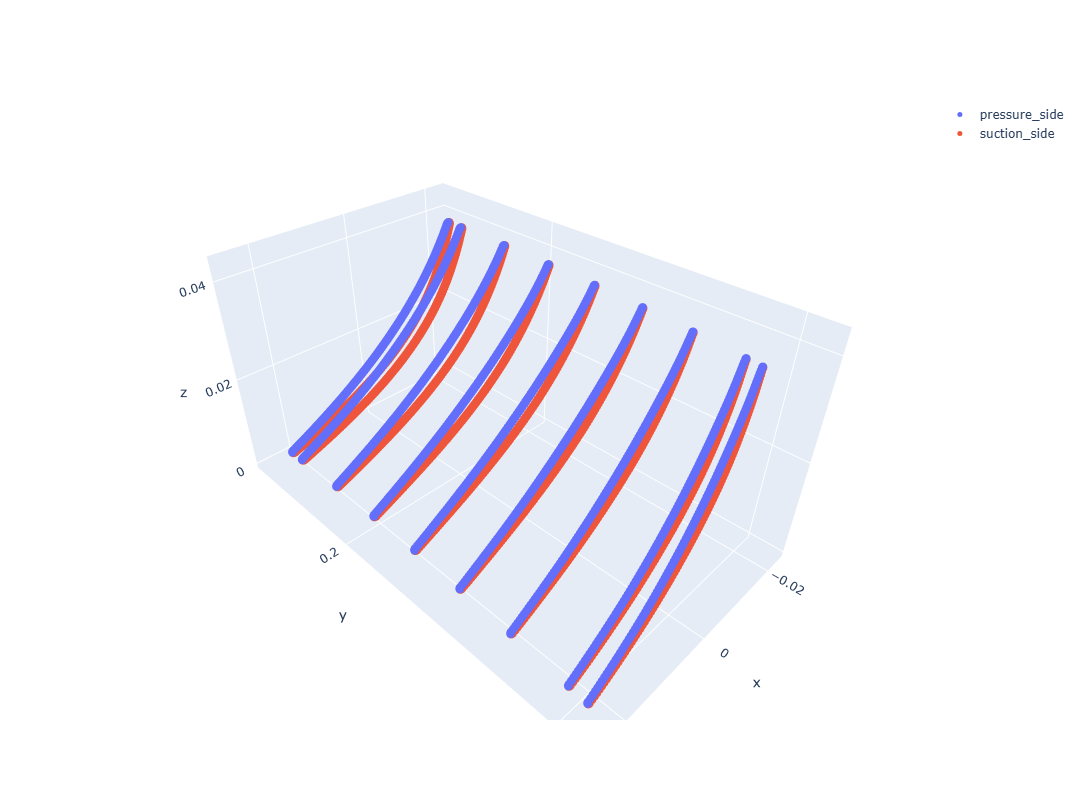

In [40]:
fig = go.Figure(data=[
                      go.Scatter3d(x=pressure_side[:, 0], y=pressure_side[:, 1], z=pressure_side[:, 2],
                                   mode='markers',
                                   marker=dict(size=5),
                                   name='pressure_side'),
                      go.Scatter3d(x=suction_side[:, 0], y=suction_side[:, 1], z=suction_side[:, 2],
                                   mode='markers',
                                   marker=dict(size=5),
                                   name='suction_side'),

],
                                   layout=go.Layout(
                            width=1000,
                            height=800,
                        ))
fig.show()